## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
X,Y = californiaDataset.california_data()
n_features = 8 
n_samples = 20640
n_target = 1 

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.600
Method:                 Least Squares   F-statistic:                              3102.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:03:14   Log-Likelihood:                         -15762.
No. Observations:               16512   AIC:                                  3.154e+04
Df Residuals:                   16504   BIC:                                  3.160e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

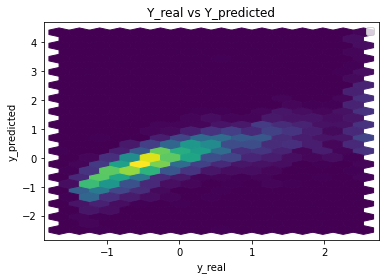

Performance Metrics
Mean Squared Error: 0.3890517594356572
Mean Absolute Error: 0.46028619968259216
Manhattan distance: 1900.0614322897388
Euclidean distance: 40.07500047349218


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.3861611956279315


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.064294
0:	learn: 0.9642878	total: 65.4ms	remaining: 1m 5s
1:	learn: 0.9325109	total: 68.7ms	remaining: 34.3s
2:	learn: 0.9022554	total: 71.3ms	remaining: 23.7s
3:	learn: 0.8744016	total: 74.4ms	remaining: 18.5s
4:	learn: 0.8480693	total: 77.5ms	remaining: 15.4s
5:	learn: 0.8248479	total: 79.9ms	remaining: 13.2s
6:	learn: 0.8026364	total: 83.2ms	remaining: 11.8s
7:	learn: 0.7824422	total: 85.5ms	remaining: 10.6s
8:	learn: 0.7650525	total: 88.2ms	remaining: 9.71s
9:	learn: 0.7465290	total: 90.9ms	remaining: 9s
10:	learn: 0.7297984	total: 93.3ms	remaining: 8.39s
11:	learn: 0.7143890	total: 95.9ms	remaining: 7.89s
12:	learn: 0.7006504	total: 98.2ms	remaining: 7.46s
13:	learn: 0.6862475	total: 100ms	remaining: 7.08s
14:	learn: 0.6736092	total: 103ms	remaining: 6.74s
15:	learn: 0.6629769	total: 105ms	remaining: 6.44s
16:	learn: 0.6522857	total: 107ms	remaining: 6.18s
17:	learn: 0.6427420	total: 109ms	remaining: 5.95s
18:	learn: 0.6343996	total: 112ms	remaining: 5.76s
1

25:	learn: 0.5793742	total: 131ms	remaining: 4.9s
26:	learn: 0.5740973	total: 133ms	remaining: 4.79s
27:	learn: 0.5697809	total: 136ms	remaining: 4.71s
28:	learn: 0.5640600	total: 138ms	remaining: 4.63s
29:	learn: 0.5599218	total: 141ms	remaining: 4.54s
30:	learn: 0.5566920	total: 143ms	remaining: 4.48s
31:	learn: 0.5533043	total: 146ms	remaining: 4.41s
32:	learn: 0.5500862	total: 148ms	remaining: 4.34s
33:	learn: 0.5474620	total: 150ms	remaining: 4.27s
34:	learn: 0.5422769	total: 153ms	remaining: 4.21s
35:	learn: 0.5398364	total: 155ms	remaining: 4.15s
36:	learn: 0.5350509	total: 157ms	remaining: 4.1s
37:	learn: 0.5303990	total: 160ms	remaining: 4.05s
38:	learn: 0.5268264	total: 163ms	remaining: 4.01s
39:	learn: 0.5236991	total: 166ms	remaining: 3.97s
40:	learn: 0.5211065	total: 168ms	remaining: 3.93s
41:	learn: 0.5180136	total: 171ms	remaining: 3.89s
42:	learn: 0.5156664	total: 173ms	remaining: 3.85s
43:	learn: 0.5133488	total: 175ms	remaining: 3.81s
44:	learn: 0.5100871	total: 178ms

52:	learn: 0.4950591	total: 196ms	remaining: 3.5s
53:	learn: 0.4931268	total: 198ms	remaining: 3.47s
54:	learn: 0.4907311	total: 201ms	remaining: 3.45s
55:	learn: 0.4895317	total: 203ms	remaining: 3.43s
56:	learn: 0.4882426	total: 206ms	remaining: 3.4s
57:	learn: 0.4874332	total: 208ms	remaining: 3.38s
58:	learn: 0.4864390	total: 211ms	remaining: 3.37s
59:	learn: 0.4855403	total: 214ms	remaining: 3.35s
60:	learn: 0.4845507	total: 216ms	remaining: 3.33s
61:	learn: 0.4836776	total: 219ms	remaining: 3.31s
62:	learn: 0.4827896	total: 221ms	remaining: 3.28s
63:	learn: 0.4805035	total: 223ms	remaining: 3.26s
64:	learn: 0.4795983	total: 226ms	remaining: 3.24s
65:	learn: 0.4788922	total: 228ms	remaining: 3.23s
66:	learn: 0.4775912	total: 230ms	remaining: 3.21s
67:	learn: 0.4765244	total: 232ms	remaining: 3.18s
68:	learn: 0.4751230	total: 235ms	remaining: 3.17s
69:	learn: 0.4737981	total: 237ms	remaining: 3.15s
70:	learn: 0.4728392	total: 239ms	remaining: 3.13s
71:	learn: 0.4719307	total: 241ms

106:	learn: 0.4476717	total: 327ms	remaining: 2.73s
107:	learn: 0.4469925	total: 329ms	remaining: 2.72s
108:	learn: 0.4463978	total: 331ms	remaining: 2.71s
109:	learn: 0.4458785	total: 336ms	remaining: 2.72s
110:	learn: 0.4454326	total: 338ms	remaining: 2.71s
111:	learn: 0.4450308	total: 341ms	remaining: 2.7s
112:	learn: 0.4442948	total: 343ms	remaining: 2.69s
113:	learn: 0.4436776	total: 345ms	remaining: 2.68s
114:	learn: 0.4432369	total: 347ms	remaining: 2.67s
115:	learn: 0.4426806	total: 350ms	remaining: 2.66s
116:	learn: 0.4424417	total: 352ms	remaining: 2.66s
117:	learn: 0.4419384	total: 354ms	remaining: 2.65s
118:	learn: 0.4410371	total: 357ms	remaining: 2.64s
119:	learn: 0.4406003	total: 360ms	remaining: 2.64s
120:	learn: 0.4400310	total: 362ms	remaining: 2.63s
121:	learn: 0.4393747	total: 365ms	remaining: 2.63s
122:	learn: 0.4390312	total: 367ms	remaining: 2.62s
123:	learn: 0.4381309	total: 370ms	remaining: 2.61s
124:	learn: 0.4377220	total: 373ms	remaining: 2.61s
125:	learn: 0

129:	learn: 0.4357236	total: 391ms	remaining: 2.62s
130:	learn: 0.4350990	total: 394ms	remaining: 2.61s
131:	learn: 0.4347235	total: 397ms	remaining: 2.61s
132:	learn: 0.4340331	total: 399ms	remaining: 2.6s
133:	learn: 0.4332252	total: 402ms	remaining: 2.6s
134:	learn: 0.4327899	total: 409ms	remaining: 2.62s
135:	learn: 0.4323905	total: 411ms	remaining: 2.61s
136:	learn: 0.4320615	total: 413ms	remaining: 2.6s
137:	learn: 0.4316991	total: 416ms	remaining: 2.6s
138:	learn: 0.4309723	total: 419ms	remaining: 2.59s
139:	learn: 0.4305951	total: 421ms	remaining: 2.58s
140:	learn: 0.4301727	total: 424ms	remaining: 2.58s
141:	learn: 0.4296467	total: 426ms	remaining: 2.58s
142:	learn: 0.4291568	total: 429ms	remaining: 2.57s
143:	learn: 0.4286353	total: 431ms	remaining: 2.56s
144:	learn: 0.4282763	total: 434ms	remaining: 2.56s
145:	learn: 0.4278394	total: 436ms	remaining: 2.55s
146:	learn: 0.4273853	total: 439ms	remaining: 2.54s
147:	learn: 0.4270033	total: 441ms	remaining: 2.54s
148:	learn: 0.42

178:	learn: 0.4141852	total: 522ms	remaining: 2.39s
179:	learn: 0.4133890	total: 525ms	remaining: 2.39s
180:	learn: 0.4131167	total: 537ms	remaining: 2.43s
181:	learn: 0.4126108	total: 540ms	remaining: 2.43s
182:	learn: 0.4120695	total: 543ms	remaining: 2.42s
183:	learn: 0.4115611	total: 576ms	remaining: 2.55s
184:	learn: 0.4111115	total: 579ms	remaining: 2.55s
185:	learn: 0.4107888	total: 583ms	remaining: 2.55s


186:	learn: 0.4102657	total: 606ms	remaining: 2.63s
187:	learn: 0.4098716	total: 610ms	remaining: 2.63s
188:	learn: 0.4095050	total: 613ms	remaining: 2.63s
189:	learn: 0.4091600	total: 617ms	remaining: 2.63s
190:	learn: 0.4087856	total: 620ms	remaining: 2.62s
191:	learn: 0.4084889	total: 623ms	remaining: 2.62s
192:	learn: 0.4081808	total: 626ms	remaining: 2.62s
193:	learn: 0.4078061	total: 638ms	remaining: 2.65s
194:	learn: 0.4074815	total: 641ms	remaining: 2.65s
195:	learn: 0.4071470	total: 645ms	remaining: 2.64s
196:	learn: 0.4068993	total: 658ms	remaining: 2.68s
197:	learn: 0.4066160	total: 701ms	remaining: 2.84s
198:	learn: 0.4061889	total: 706ms	remaining: 2.84s


199:	learn: 0.4056821	total: 729ms	remaining: 2.91s
200:	learn: 0.4054020	total: 731ms	remaining: 2.91s
201:	learn: 0.4050275	total: 734ms	remaining: 2.9s
202:	learn: 0.4046974	total: 737ms	remaining: 2.89s
203:	learn: 0.4044329	total: 739ms	remaining: 2.88s
204:	learn: 0.4041492	total: 742ms	remaining: 2.88s
205:	learn: 0.4039133	total: 745ms	remaining: 2.87s
206:	learn: 0.4036973	total: 747ms	remaining: 2.86s
207:	learn: 0.4033223	total: 749ms	remaining: 2.85s
208:	learn: 0.4029606	total: 752ms	remaining: 2.84s
209:	learn: 0.4026705	total: 754ms	remaining: 2.84s
210:	learn: 0.4020532	total: 757ms	remaining: 2.83s
211:	learn: 0.4016929	total: 759ms	remaining: 2.82s
212:	learn: 0.4014192	total: 761ms	remaining: 2.81s
213:	learn: 0.4010937	total: 764ms	remaining: 2.81s
214:	learn: 0.4004955	total: 766ms	remaining: 2.8s
215:	learn: 0.4002408	total: 769ms	remaining: 2.79s
216:	learn: 0.3999793	total: 771ms	remaining: 2.78s
217:	learn: 0.3996382	total: 773ms	remaining: 2.77s
218:	learn: 0.

229:	learn: 0.3961444	total: 803ms	remaining: 2.69s
230:	learn: 0.3958774	total: 805ms	remaining: 2.68s
231:	learn: 0.3955574	total: 808ms	remaining: 2.67s
232:	learn: 0.3952917	total: 810ms	remaining: 2.67s
233:	learn: 0.3950868	total: 813ms	remaining: 2.66s
234:	learn: 0.3947990	total: 816ms	remaining: 2.65s
235:	learn: 0.3945237	total: 818ms	remaining: 2.65s
236:	learn: 0.3943303	total: 820ms	remaining: 2.64s
237:	learn: 0.3940314	total: 823ms	remaining: 2.63s
238:	learn: 0.3937997	total: 825ms	remaining: 2.63s
239:	learn: 0.3935674	total: 827ms	remaining: 2.62s
240:	learn: 0.3933405	total: 830ms	remaining: 2.61s
241:	learn: 0.3930993	total: 833ms	remaining: 2.61s
242:	learn: 0.3928738	total: 835ms	remaining: 2.6s
243:	learn: 0.3926692	total: 838ms	remaining: 2.6s
244:	learn: 0.3923689	total: 842ms	remaining: 2.59s
245:	learn: 0.3921772	total: 844ms	remaining: 2.59s
246:	learn: 0.3918960	total: 847ms	remaining: 2.58s
247:	learn: 0.3916610	total: 850ms	remaining: 2.58s
248:	learn: 0.

274:	learn: 0.3853278	total: 924ms	remaining: 2.44s
275:	learn: 0.3850999	total: 927ms	remaining: 2.43s
276:	learn: 0.3849467	total: 930ms	remaining: 2.43s
277:	learn: 0.3844364	total: 932ms	remaining: 2.42s
278:	learn: 0.3841133	total: 935ms	remaining: 2.42s
279:	learn: 0.3838936	total: 938ms	remaining: 2.41s
280:	learn: 0.3836645	total: 941ms	remaining: 2.41s
281:	learn: 0.3834785	total: 944ms	remaining: 2.4s
282:	learn: 0.3832871	total: 946ms	remaining: 2.4s
283:	learn: 0.3830427	total: 949ms	remaining: 2.39s
284:	learn: 0.3829013	total: 951ms	remaining: 2.39s
285:	learn: 0.3825832	total: 954ms	remaining: 2.38s
286:	learn: 0.3823911	total: 956ms	remaining: 2.38s
287:	learn: 0.3820485	total: 959ms	remaining: 2.37s
288:	learn: 0.3818443	total: 962ms	remaining: 2.37s
289:	learn: 0.3815458	total: 964ms	remaining: 2.36s
290:	learn: 0.3811884	total: 967ms	remaining: 2.35s
291:	learn: 0.3810688	total: 969ms	remaining: 2.35s
292:	learn: 0.3809717	total: 971ms	remaining: 2.34s
293:	learn: 0.

303:	learn: 0.3787679	total: 998ms	remaining: 2.29s
304:	learn: 0.3785015	total: 1s	remaining: 2.28s
305:	learn: 0.3783758	total: 1s	remaining: 2.27s
306:	learn: 0.3781088	total: 1s	remaining: 2.27s
307:	learn: 0.3777997	total: 1.01s	remaining: 2.26s
308:	learn: 0.3775633	total: 1.01s	remaining: 2.26s
309:	learn: 0.3773423	total: 1.01s	remaining: 2.25s
310:	learn: 0.3771588	total: 1.01s	remaining: 2.25s
311:	learn: 0.3769865	total: 1.02s	remaining: 2.24s
312:	learn: 0.3767521	total: 1.02s	remaining: 2.24s
313:	learn: 0.3765451	total: 1.02s	remaining: 2.23s
314:	learn: 0.3763842	total: 1.02s	remaining: 2.23s
315:	learn: 0.3762315	total: 1.03s	remaining: 2.22s
316:	learn: 0.3761244	total: 1.03s	remaining: 2.22s
317:	learn: 0.3759470	total: 1.03s	remaining: 2.21s
318:	learn: 0.3758208	total: 1.03s	remaining: 2.21s
319:	learn: 0.3756141	total: 1.04s	remaining: 2.2s
320:	learn: 0.3752280	total: 1.04s	remaining: 2.2s
321:	learn: 0.3750008	total: 1.04s	remaining: 2.19s
322:	learn: 0.3747004	t

350:	learn: 0.3689180	total: 1.12s	remaining: 2.07s
351:	learn: 0.3687879	total: 1.12s	remaining: 2.06s
352:	learn: 0.3686626	total: 1.12s	remaining: 2.06s
353:	learn: 0.3685476	total: 1.13s	remaining: 2.06s
354:	learn: 0.3683323	total: 1.13s	remaining: 2.05s
355:	learn: 0.3681994	total: 1.13s	remaining: 2.05s
356:	learn: 0.3680669	total: 1.13s	remaining: 2.04s
357:	learn: 0.3679345	total: 1.14s	remaining: 2.04s
358:	learn: 0.3677490	total: 1.14s	remaining: 2.03s
359:	learn: 0.3675314	total: 1.14s	remaining: 2.03s
360:	learn: 0.3673803	total: 1.14s	remaining: 2.02s
361:	learn: 0.3671796	total: 1.15s	remaining: 2.02s
362:	learn: 0.3669644	total: 1.15s	remaining: 2.01s
363:	learn: 0.3668107	total: 1.15s	remaining: 2.01s
364:	learn: 0.3666214	total: 1.15s	remaining: 2s
365:	learn: 0.3664835	total: 1.16s	remaining: 2s
366:	learn: 0.3663661	total: 1.16s	remaining: 2s
367:	learn: 0.3661532	total: 1.16s	remaining: 1.99s
368:	learn: 0.3659773	total: 1.16s	remaining: 1.99s
369:	learn: 0.3658418

382:	learn: 0.3636298	total: 1.2s	remaining: 1.93s
383:	learn: 0.3635054	total: 1.2s	remaining: 1.92s
384:	learn: 0.3633771	total: 1.2s	remaining: 1.92s
385:	learn: 0.3632574	total: 1.2s	remaining: 1.91s
386:	learn: 0.3631627	total: 1.2s	remaining: 1.91s
387:	learn: 0.3628433	total: 1.21s	remaining: 1.9s
388:	learn: 0.3626267	total: 1.21s	remaining: 1.9s
389:	learn: 0.3624548	total: 1.21s	remaining: 1.9s
390:	learn: 0.3621686	total: 1.21s	remaining: 1.89s
391:	learn: 0.3619678	total: 1.22s	remaining: 1.89s
392:	learn: 0.3618185	total: 1.22s	remaining: 1.89s
393:	learn: 0.3616038	total: 1.22s	remaining: 1.88s
394:	learn: 0.3614739	total: 1.23s	remaining: 1.88s
395:	learn: 0.3612987	total: 1.23s	remaining: 1.88s
396:	learn: 0.3611371	total: 1.23s	remaining: 1.87s
397:	learn: 0.3609853	total: 1.23s	remaining: 1.87s
398:	learn: 0.3608367	total: 1.24s	remaining: 1.86s
399:	learn: 0.3606691	total: 1.24s	remaining: 1.86s
400:	learn: 0.3604276	total: 1.24s	remaining: 1.85s
401:	learn: 0.360260

430:	learn: 0.3556490	total: 1.31s	remaining: 1.74s
431:	learn: 0.3555100	total: 1.32s	remaining: 1.73s
432:	learn: 0.3552721	total: 1.32s	remaining: 1.73s
433:	learn: 0.3551575	total: 1.32s	remaining: 1.72s
434:	learn: 0.3550305	total: 1.32s	remaining: 1.72s
435:	learn: 0.3548571	total: 1.33s	remaining: 1.72s
436:	learn: 0.3546232	total: 1.33s	remaining: 1.71s
437:	learn: 0.3545569	total: 1.33s	remaining: 1.71s
438:	learn: 0.3544685	total: 1.33s	remaining: 1.71s
439:	learn: 0.3543290	total: 1.34s	remaining: 1.7s
440:	learn: 0.3542319	total: 1.34s	remaining: 1.7s
441:	learn: 0.3540672	total: 1.34s	remaining: 1.69s
442:	learn: 0.3538975	total: 1.34s	remaining: 1.69s
443:	learn: 0.3537291	total: 1.35s	remaining: 1.69s
444:	learn: 0.3536072	total: 1.35s	remaining: 1.68s
445:	learn: 0.3534326	total: 1.35s	remaining: 1.68s
446:	learn: 0.3533137	total: 1.35s	remaining: 1.67s
447:	learn: 0.3531780	total: 1.36s	remaining: 1.67s
448:	learn: 0.3530386	total: 1.36s	remaining: 1.67s
449:	learn: 0.

460:	learn: 0.3514316	total: 1.39s	remaining: 1.63s
461:	learn: 0.3513098	total: 1.4s	remaining: 1.62s
462:	learn: 0.3512030	total: 1.4s	remaining: 1.62s
463:	learn: 0.3510939	total: 1.4s	remaining: 1.62s
464:	learn: 0.3509685	total: 1.4s	remaining: 1.62s
465:	learn: 0.3508678	total: 1.41s	remaining: 1.61s
466:	learn: 0.3507152	total: 1.41s	remaining: 1.61s
467:	learn: 0.3506122	total: 1.41s	remaining: 1.61s
468:	learn: 0.3504551	total: 1.42s	remaining: 1.6s
469:	learn: 0.3503424	total: 1.42s	remaining: 1.6s
470:	learn: 0.3501937	total: 1.42s	remaining: 1.6s
471:	learn: 0.3501374	total: 1.42s	remaining: 1.59s
472:	learn: 0.3500201	total: 1.43s	remaining: 1.59s
473:	learn: 0.3498042	total: 1.43s	remaining: 1.59s
474:	learn: 0.3495936	total: 1.43s	remaining: 1.58s
475:	learn: 0.3494066	total: 1.43s	remaining: 1.58s
476:	learn: 0.3492796	total: 1.44s	remaining: 1.57s
477:	learn: 0.3490418	total: 1.44s	remaining: 1.57s
478:	learn: 0.3489734	total: 1.44s	remaining: 1.57s
479:	learn: 0.34879

503:	learn: 0.3452890	total: 1.51s	remaining: 1.49s
504:	learn: 0.3451611	total: 1.51s	remaining: 1.48s
505:	learn: 0.3450740	total: 1.52s	remaining: 1.48s
506:	learn: 0.3449420	total: 1.52s	remaining: 1.48s
507:	learn: 0.3448445	total: 1.52s	remaining: 1.47s
508:	learn: 0.3446680	total: 1.52s	remaining: 1.47s
509:	learn: 0.3445160	total: 1.53s	remaining: 1.47s
510:	learn: 0.3444588	total: 1.53s	remaining: 1.46s
511:	learn: 0.3442337	total: 1.53s	remaining: 1.46s
512:	learn: 0.3441822	total: 1.53s	remaining: 1.46s
513:	learn: 0.3439785	total: 1.54s	remaining: 1.45s
514:	learn: 0.3438333	total: 1.54s	remaining: 1.45s
515:	learn: 0.3436598	total: 1.54s	remaining: 1.45s
516:	learn: 0.3435549	total: 1.54s	remaining: 1.44s
517:	learn: 0.3434330	total: 1.55s	remaining: 1.44s
518:	learn: 0.3433355	total: 1.55s	remaining: 1.44s
519:	learn: 0.3432072	total: 1.55s	remaining: 1.43s
520:	learn: 0.3430289	total: 1.55s	remaining: 1.43s
521:	learn: 0.3429054	total: 1.56s	remaining: 1.43s
522:	learn: 

534:	learn: 0.3411744	total: 1.59s	remaining: 1.38s
535:	learn: 0.3410846	total: 1.59s	remaining: 1.38s
536:	learn: 0.3410041	total: 1.59s	remaining: 1.38s
537:	learn: 0.3408849	total: 1.6s	remaining: 1.37s
538:	learn: 0.3407877	total: 1.6s	remaining: 1.37s
539:	learn: 0.3406652	total: 1.6s	remaining: 1.36s
540:	learn: 0.3405388	total: 1.6s	remaining: 1.36s
541:	learn: 0.3404246	total: 1.61s	remaining: 1.36s
542:	learn: 0.3403320	total: 1.61s	remaining: 1.35s
543:	learn: 0.3401948	total: 1.61s	remaining: 1.35s
544:	learn: 0.3400631	total: 1.61s	remaining: 1.35s
545:	learn: 0.3399852	total: 1.62s	remaining: 1.34s
546:	learn: 0.3398735	total: 1.62s	remaining: 1.34s
547:	learn: 0.3397456	total: 1.62s	remaining: 1.34s
548:	learn: 0.3396452	total: 1.62s	remaining: 1.33s
549:	learn: 0.3395079	total: 1.63s	remaining: 1.33s
550:	learn: 0.3394002	total: 1.63s	remaining: 1.33s
551:	learn: 0.3392912	total: 1.63s	remaining: 1.32s
552:	learn: 0.3391650	total: 1.63s	remaining: 1.32s
553:	learn: 0.33

583:	learn: 0.3352572	total: 1.71s	remaining: 1.22s
584:	learn: 0.3351855	total: 1.71s	remaining: 1.22s
585:	learn: 0.3350149	total: 1.72s	remaining: 1.21s
586:	learn: 0.3349108	total: 1.72s	remaining: 1.21s
587:	learn: 0.3348257	total: 1.72s	remaining: 1.21s
588:	learn: 0.3346221	total: 1.73s	remaining: 1.2s
589:	learn: 0.3345437	total: 1.73s	remaining: 1.2s
590:	learn: 0.3343899	total: 1.73s	remaining: 1.2s
591:	learn: 0.3342377	total: 1.73s	remaining: 1.19s
592:	learn: 0.3341149	total: 1.74s	remaining: 1.19s
593:	learn: 0.3340401	total: 1.74s	remaining: 1.19s
594:	learn: 0.3339162	total: 1.74s	remaining: 1.18s
595:	learn: 0.3337981	total: 1.74s	remaining: 1.18s
596:	learn: 0.3336782	total: 1.74s	remaining: 1.18s
597:	learn: 0.3335987	total: 1.75s	remaining: 1.17s
598:	learn: 0.3335006	total: 1.75s	remaining: 1.17s
599:	learn: 0.3333311	total: 1.75s	remaining: 1.17s
600:	learn: 0.3332305	total: 1.75s	remaining: 1.16s
601:	learn: 0.3331180	total: 1.76s	remaining: 1.16s
602:	learn: 0.3

613:	learn: 0.3318057	total: 1.79s	remaining: 1.12s
614:	learn: 0.3316970	total: 1.79s	remaining: 1.12s
615:	learn: 0.3316262	total: 1.79s	remaining: 1.12s
616:	learn: 0.3315007	total: 1.79s	remaining: 1.11s
617:	learn: 0.3314134	total: 1.79s	remaining: 1.11s
618:	learn: 0.3312796	total: 1.8s	remaining: 1.11s
619:	learn: 0.3311743	total: 1.8s	remaining: 1.1s
620:	learn: 0.3310450	total: 1.8s	remaining: 1.1s
621:	learn: 0.3309395	total: 1.81s	remaining: 1.1s
622:	learn: 0.3308624	total: 1.81s	remaining: 1.09s
623:	learn: 0.3307571	total: 1.81s	remaining: 1.09s
624:	learn: 0.3306844	total: 1.81s	remaining: 1.09s
625:	learn: 0.3305973	total: 1.82s	remaining: 1.08s
626:	learn: 0.3305039	total: 1.82s	remaining: 1.08s
627:	learn: 0.3303569	total: 1.82s	remaining: 1.08s
628:	learn: 0.3302772	total: 1.82s	remaining: 1.07s
629:	learn: 0.3301528	total: 1.83s	remaining: 1.07s
630:	learn: 0.3300722	total: 1.83s	remaining: 1.07s
631:	learn: 0.3299667	total: 1.83s	remaining: 1.07s
632:	learn: 0.3298

662:	learn: 0.3269463	total: 1.91s	remaining: 970ms
663:	learn: 0.3268214	total: 1.91s	remaining: 967ms
664:	learn: 0.3266985	total: 1.91s	remaining: 964ms
665:	learn: 0.3266166	total: 1.92s	remaining: 961ms
666:	learn: 0.3265172	total: 1.92s	remaining: 957ms
667:	learn: 0.3264586	total: 1.92s	remaining: 954ms
668:	learn: 0.3262569	total: 1.92s	remaining: 951ms
669:	learn: 0.3261536	total: 1.92s	remaining: 948ms
670:	learn: 0.3260708	total: 1.93s	remaining: 945ms
671:	learn: 0.3259196	total: 1.93s	remaining: 942ms
672:	learn: 0.3258391	total: 1.93s	remaining: 939ms
673:	learn: 0.3257649	total: 1.93s	remaining: 936ms
674:	learn: 0.3256302	total: 1.94s	remaining: 933ms
675:	learn: 0.3254370	total: 1.94s	remaining: 929ms
676:	learn: 0.3253243	total: 1.94s	remaining: 927ms
677:	learn: 0.3252070	total: 1.94s	remaining: 923ms
678:	learn: 0.3251358	total: 1.95s	remaining: 920ms
679:	learn: 0.3250306	total: 1.95s	remaining: 917ms
680:	learn: 0.3248934	total: 1.95s	remaining: 914ms
681:	learn: 

693:	learn: 0.3236317	total: 1.98s	remaining: 874ms
694:	learn: 0.3235294	total: 1.98s	remaining: 871ms
695:	learn: 0.3234607	total: 1.99s	remaining: 868ms
696:	learn: 0.3233921	total: 1.99s	remaining: 865ms
697:	learn: 0.3233075	total: 1.99s	remaining: 862ms
698:	learn: 0.3231560	total: 1.99s	remaining: 859ms
699:	learn: 0.3230393	total: 2s	remaining: 856ms
700:	learn: 0.3229410	total: 2s	remaining: 853ms
701:	learn: 0.3228547	total: 2s	remaining: 850ms
702:	learn: 0.3227079	total: 2s	remaining: 847ms
703:	learn: 0.3226651	total: 2.01s	remaining: 844ms
704:	learn: 0.3226081	total: 2.01s	remaining: 841ms
705:	learn: 0.3224932	total: 2.01s	remaining: 838ms
706:	learn: 0.3224219	total: 2.01s	remaining: 835ms
707:	learn: 0.3222962	total: 2.02s	remaining: 832ms
708:	learn: 0.3222296	total: 2.02s	remaining: 829ms
709:	learn: 0.3221582	total: 2.02s	remaining: 826ms
710:	learn: 0.3220927	total: 2.02s	remaining: 823ms
711:	learn: 0.3219324	total: 2.03s	remaining: 820ms
712:	learn: 0.3217880	to

738:	learn: 0.3192821	total: 2.1s	remaining: 743ms
739:	learn: 0.3191960	total: 2.11s	remaining: 740ms
740:	learn: 0.3190988	total: 2.11s	remaining: 737ms
741:	learn: 0.3189845	total: 2.11s	remaining: 734ms
742:	learn: 0.3188492	total: 2.11s	remaining: 731ms
743:	learn: 0.3187614	total: 2.12s	remaining: 728ms
744:	learn: 0.3186637	total: 2.12s	remaining: 725ms
745:	learn: 0.3185954	total: 2.12s	remaining: 722ms
746:	learn: 0.3184912	total: 2.12s	remaining: 719ms
747:	learn: 0.3183657	total: 2.13s	remaining: 716ms
748:	learn: 0.3182900	total: 2.13s	remaining: 714ms
749:	learn: 0.3181992	total: 2.13s	remaining: 711ms
750:	learn: 0.3180161	total: 2.13s	remaining: 708ms
751:	learn: 0.3179014	total: 2.14s	remaining: 705ms
752:	learn: 0.3178635	total: 2.14s	remaining: 702ms
753:	learn: 0.3176606	total: 2.14s	remaining: 699ms
754:	learn: 0.3176019	total: 2.14s	remaining: 696ms
755:	learn: 0.3175126	total: 2.15s	remaining: 693ms
756:	learn: 0.3174237	total: 2.15s	remaining: 690ms
757:	learn: 0

768:	learn: 0.3164911	total: 2.18s	remaining: 655ms
769:	learn: 0.3162824	total: 2.18s	remaining: 652ms
770:	learn: 0.3161961	total: 2.18s	remaining: 649ms
771:	learn: 0.3161314	total: 2.19s	remaining: 646ms
772:	learn: 0.3160520	total: 2.19s	remaining: 643ms
773:	learn: 0.3159193	total: 2.19s	remaining: 640ms
774:	learn: 0.3158289	total: 2.19s	remaining: 637ms
775:	learn: 0.3156702	total: 2.2s	remaining: 634ms
776:	learn: 0.3154751	total: 2.2s	remaining: 631ms
777:	learn: 0.3153994	total: 2.2s	remaining: 628ms
778:	learn: 0.3153290	total: 2.2s	remaining: 625ms
779:	learn: 0.3152333	total: 2.21s	remaining: 623ms
780:	learn: 0.3151338	total: 2.21s	remaining: 620ms
781:	learn: 0.3150474	total: 2.21s	remaining: 617ms
782:	learn: 0.3149727	total: 2.21s	remaining: 614ms
783:	learn: 0.3148935	total: 2.22s	remaining: 611ms
784:	learn: 0.3147893	total: 2.22s	remaining: 608ms
785:	learn: 0.3147298	total: 2.22s	remaining: 605ms
786:	learn: 0.3146612	total: 2.23s	remaining: 602ms
787:	learn: 0.31

816:	learn: 0.3119244	total: 2.3s	remaining: 515ms
817:	learn: 0.3117805	total: 2.3s	remaining: 512ms
818:	learn: 0.3116201	total: 2.3s	remaining: 509ms
819:	learn: 0.3114855	total: 2.31s	remaining: 506ms
820:	learn: 0.3113774	total: 2.31s	remaining: 503ms
821:	learn: 0.3113224	total: 2.31s	remaining: 501ms
822:	learn: 0.3112534	total: 2.31s	remaining: 498ms
823:	learn: 0.3111713	total: 2.32s	remaining: 495ms
824:	learn: 0.3110913	total: 2.32s	remaining: 492ms
825:	learn: 0.3109818	total: 2.32s	remaining: 489ms
826:	learn: 0.3109228	total: 2.32s	remaining: 486ms
827:	learn: 0.3108531	total: 2.33s	remaining: 483ms
828:	learn: 0.3107856	total: 2.33s	remaining: 481ms
829:	learn: 0.3107161	total: 2.33s	remaining: 478ms
830:	learn: 0.3106707	total: 2.33s	remaining: 475ms
831:	learn: 0.3106131	total: 2.34s	remaining: 472ms
832:	learn: 0.3105270	total: 2.34s	remaining: 469ms
833:	learn: 0.3104267	total: 2.34s	remaining: 466ms
834:	learn: 0.3103222	total: 2.35s	remaining: 463ms
835:	learn: 0.3

846:	learn: 0.3092668	total: 2.37s	remaining: 429ms
847:	learn: 0.3092150	total: 2.38s	remaining: 426ms
848:	learn: 0.3091385	total: 2.38s	remaining: 423ms
849:	learn: 0.3090600	total: 2.38s	remaining: 420ms
850:	learn: 0.3089353	total: 2.38s	remaining: 417ms
851:	learn: 0.3088680	total: 2.39s	remaining: 414ms
852:	learn: 0.3087860	total: 2.39s	remaining: 412ms
853:	learn: 0.3086976	total: 2.39s	remaining: 409ms
854:	learn: 0.3086143	total: 2.39s	remaining: 406ms
855:	learn: 0.3085420	total: 2.4s	remaining: 403ms
856:	learn: 0.3084766	total: 2.4s	remaining: 400ms
857:	learn: 0.3084216	total: 2.4s	remaining: 397ms
858:	learn: 0.3083142	total: 2.4s	remaining: 395ms
859:	learn: 0.3082559	total: 2.41s	remaining: 392ms
860:	learn: 0.3082165	total: 2.41s	remaining: 389ms
861:	learn: 0.3080853	total: 2.41s	remaining: 386ms
862:	learn: 0.3080195	total: 2.41s	remaining: 383ms
863:	learn: 0.3079074	total: 2.42s	remaining: 380ms
864:	learn: 0.3078250	total: 2.42s	remaining: 377ms
865:	learn: 0.30

895:	learn: 0.3051328	total: 2.5s	remaining: 290ms
896:	learn: 0.3050605	total: 2.5s	remaining: 287ms
897:	learn: 0.3049618	total: 2.5s	remaining: 284ms
898:	learn: 0.3049068	total: 2.5s	remaining: 281ms
899:	learn: 0.3048834	total: 2.51s	remaining: 279ms
900:	learn: 0.3048168	total: 2.51s	remaining: 276ms
901:	learn: 0.3047489	total: 2.51s	remaining: 273ms
902:	learn: 0.3046688	total: 2.52s	remaining: 270ms
903:	learn: 0.3045982	total: 2.52s	remaining: 268ms
904:	learn: 0.3045442	total: 2.52s	remaining: 265ms
905:	learn: 0.3044793	total: 2.52s	remaining: 262ms
906:	learn: 0.3043631	total: 2.53s	remaining: 259ms
907:	learn: 0.3042731	total: 2.53s	remaining: 256ms
908:	learn: 0.3041711	total: 2.53s	remaining: 254ms
909:	learn: 0.3040656	total: 2.54s	remaining: 251ms
910:	learn: 0.3039777	total: 2.54s	remaining: 248ms
911:	learn: 0.3038665	total: 2.54s	remaining: 245ms
912:	learn: 0.3037969	total: 2.54s	remaining: 242ms
913:	learn: 0.3037222	total: 2.55s	remaining: 240ms
914:	learn: 0.30

921:	learn: 0.3030673	total: 2.57s	remaining: 217ms
922:	learn: 0.3029412	total: 2.57s	remaining: 215ms
923:	learn: 0.3028345	total: 2.57s	remaining: 212ms
924:	learn: 0.3027771	total: 2.58s	remaining: 209ms
925:	learn: 0.3027122	total: 2.58s	remaining: 206ms
926:	learn: 0.3026147	total: 2.58s	remaining: 203ms
927:	learn: 0.3025197	total: 2.58s	remaining: 200ms
928:	learn: 0.3024223	total: 2.59s	remaining: 198ms
929:	learn: 0.3023233	total: 2.59s	remaining: 195ms
930:	learn: 0.3022342	total: 2.59s	remaining: 192ms
931:	learn: 0.3021588	total: 2.59s	remaining: 189ms
932:	learn: 0.3020598	total: 2.6s	remaining: 186ms
933:	learn: 0.3019817	total: 2.6s	remaining: 184ms
934:	learn: 0.3018396	total: 2.6s	remaining: 181ms
935:	learn: 0.3017615	total: 2.6s	remaining: 178ms
936:	learn: 0.3017060	total: 2.61s	remaining: 175ms
937:	learn: 0.3016595	total: 2.61s	remaining: 172ms
938:	learn: 0.3015384	total: 2.61s	remaining: 170ms
939:	learn: 0.3015062	total: 2.61s	remaining: 167ms
940:	learn: 0.30

971:	learn: 0.2988092	total: 2.69s	remaining: 77.5ms
972:	learn: 0.2987446	total: 2.69s	remaining: 74.8ms
973:	learn: 0.2987077	total: 2.7s	remaining: 72ms
974:	learn: 0.2986480	total: 2.7s	remaining: 69.2ms
975:	learn: 0.2985775	total: 2.7s	remaining: 66.4ms
976:	learn: 0.2984653	total: 2.7s	remaining: 63.6ms
977:	learn: 0.2983777	total: 2.71s	remaining: 60.9ms
978:	learn: 0.2982865	total: 2.71s	remaining: 58.1ms
979:	learn: 0.2982256	total: 2.71s	remaining: 55.3ms
980:	learn: 0.2981757	total: 2.71s	remaining: 52.6ms
981:	learn: 0.2981044	total: 2.72s	remaining: 49.8ms
982:	learn: 0.2980565	total: 2.72s	remaining: 47ms
983:	learn: 0.2980042	total: 2.72s	remaining: 44.2ms
984:	learn: 0.2979399	total: 2.72s	remaining: 41.5ms
985:	learn: 0.2978606	total: 2.73s	remaining: 38.7ms
986:	learn: 0.2977875	total: 2.73s	remaining: 35.9ms
987:	learn: 0.2977036	total: 2.73s	remaining: 33.2ms
988:	learn: 0.2976712	total: 2.73s	remaining: 30.4ms
989:	learn: 0.2975617	total: 2.73s	remaining: 27.6ms
9

Mean Squared error 0.14450875213100312


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 1000
batch_size = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.9981543510351127
